```{margin} Adaptation!
Some of this homework was inspired by or uses content from Prof. AJ Medford (GTech)'s lectures for ChBE4745: https://github.com/medford-group/data_analytics_ChE

The dataset came from Dow Chemicals and released publicly as part of Prof. Medford's class. 
```

# HW5 (due Monday 10/10 noon)

## Dow chemical process [100 pts]

We're going to use the same Dow process dataset that you used for the last homework and in class. You're going to use what we learned this week to fit neural networks to the dataset, and use dimensionality reduction to improve your previous fits. I think this homework should take less time than normal since I know you all are very busy with your projects!

We'll use the same code to load the dataset. 

In [23]:
import pandas as pd
import numpy as np

df = pd.read_excel('impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')

## Train/validation/test split (same as HW4, copy/paste from solutions if you want)

Split the dataset into an 80/10/10 train/val/test split. 

In [24]:
# copying from HW4 Solutions

from sklearn.model_selection import train_test_split


# Generate the train/val/test splits
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=1/10, shuffle=True, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=1/9, shuffle=True, random_state=69)

## Supervised regression with PCA with two components

Use PCA like we did in class to generate the first two principal components using the training dataset (`X_train`). Use these as features as inputs for your best model from HW4. Calculate the validation error, and compare to your results from HW4.

`````{tip}
If you're not sure which model to use, you're welcome to use the HW4 solutions which will be posted on Wednesday!), or just use the random forest regressor from sklearn.
`````

In [25]:
from sklearn.decomposition import PCA

# fit the PCA to generate the first two principle components
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)

# printing the variance from the PCA object 
variance = pca.explained_variance_ratio_
print(f'The variance of the first two components are {variance[0] * 100: .1f}% and {variance[-1] * 100: .1f}%')

The variance of the first two components are  66.4% and  30.0%


In [26]:
# from HW4 solutions, will use a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model_dt = DecisionTreeRegressor()
model_dt.fit(components, y_train)

# calculating the validation error 
val_components_dt = pca.fit_transform(X_val)
val_error2_dt = mean_absolute_error(y_val, model_dt.predict(val_components_dt))
print(f'The validation error is {val_error2_dt: .4f}.')

The validation error is  0.8677.


In [27]:
# Using a random forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(components, y_train)

#calculating the validation error 
val_components = pca.fit_transform(X_val)
val_error2 = mean_absolute_error(y_val, model.predict(val_components))
print(f'The validation error is {val_error2: .4f}.')

The validation error is  0.7168.


## Supervised regression with PCA with multiple components

Try varying the number of components in PCA from 1 to 10. What's the best validation error you can achieve? Make a plot of validation error (y) vs the number of components (x).

In [28]:
# From HW4 solutions, use a DecisionTreeRegressor
# putting the work from the first question in a for loop 

num_components_dt= []
val_error_store_dt = [] 

for i in range(1,10): 
    pca = PCA(n_components=i)
    components_dt = pca.fit_transform(X_train)

    model_dt.fit(components_dt, y_train)

    #calculating the validation error 
    val_components_dt = pca.fit_transform(X_val)
    val_error_dt = mean_absolute_error(y_val, model_dt.predict(val_components_dt))
    
    val_error_store_dt.append(val_error_dt)
    num_components_dt.append(i)



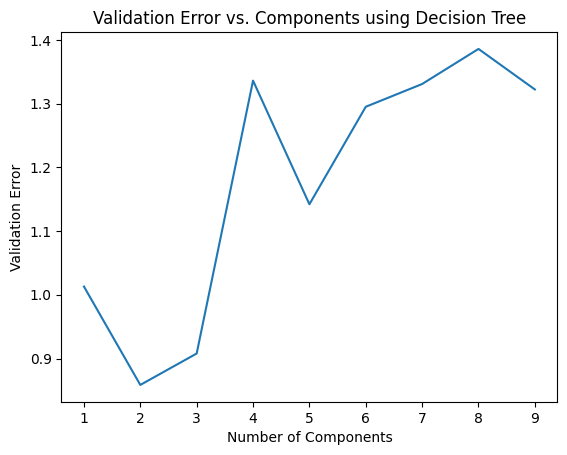

In [29]:
import matplotlib.pyplot as plt

#plotting validation error as a function of number of components
plt.plot(num_components_dt, val_error_store_dt)
plt.xlabel('Number of Components')
plt.ylabel('Validation Error')
plt.title('Validation Error vs. Components using Decision Tree');

In [30]:
# Random Forest Regressor
# putting the work from the first question in a for loop 
num_components = []
val_error_store = []
for i in range(1,10): 
    pca = PCA(n_components=i)
    components = pca.fit_transform(X_train)

    model.fit(components, y_train)

    #calculating the validation error 
    val_components = pca.fit_transform(X_val)
    val_error = mean_absolute_error(y_val, model.predict(val_components))
    
    val_error_store.append(val_error)
    num_components.append(i)



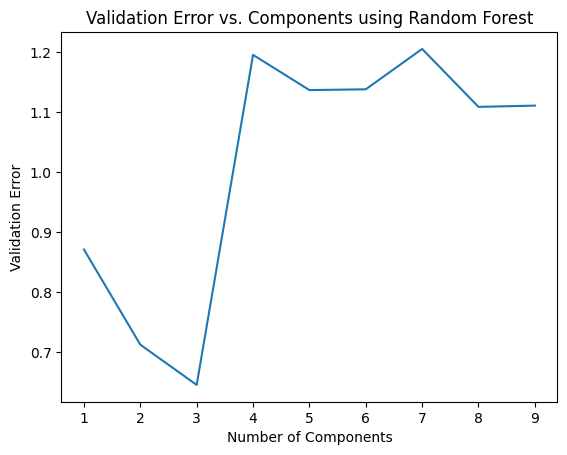

In [31]:
import matplotlib.pyplot as plt

#plotting validation error as a function of number of components
plt.plot(num_components, val_error_store)
plt.xlabel('Number of Components')
plt.ylabel('Validation Error')
plt.title('Validation Error vs. Components using Random Forest');

## Neural network with three PCA components

In class we saw that three PCA components explained most of the data. Generate the first three PCA components, and fit a neural network using MLPRegressor with 2 layers of 10 hidden nodes each. Report your validation error.

````{tip}
The MLPRegressor documentation is your friend! 
````

In [32]:
from sklearn.neural_network import MLPRegressor

# first three PCA components
pca3 = PCA(n_components=3)
components3 = pca3.fit_transform(X_train)

# MLPRegressor with two layers of 10 hidden nodes 
mlpr_model = MLPRegressor(hidden_layer_sizes=(10,10), 
                            solver="lbfgs",
                            alpha=0, 
                            tol=1e-1, 
                            max_iter=1000)

# Fitting
mlpr_model.fit(components3, y_train)

# Calculating the validation error 
val_components3 = pca3.fit_transform(X_val)
val_error3 = mean_absolute_error(y_val, mlpr_model.predict(val_components3))
print(f'The validation error for the MLPRegressor with 2 layers with 10 nodes is {val_error3: .4f}.')

The validation error for the MLPRegressor with 2 layers with 10 nodes is  0.7410.


## Varying neural network choices

Try varying the number of hidden nodes, the number of layers, and the activation function. Describe the effects you see. 

What's the best validation error you can achieve?

We can start by examining the impact of changing the number of hidden nodes has on the validation error. The number of layers and activation function will be kept the same.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


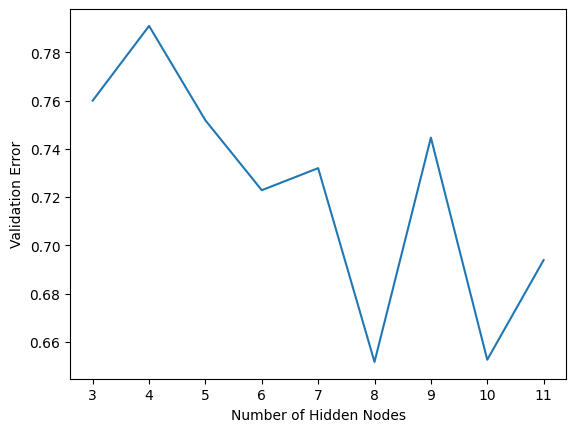

In [89]:
# Ranging the number of hidden nodes (keeping 2 layers and default activation function)

nodes = []
val_err_nodes = []
for n in range(3, 12):
    mlpr_model = MLPRegressor(hidden_layer_sizes=(n,n),                            
                            solver="lbfgs",
                            alpha=0, 
                            tol=1e-1, 
                            max_iter=1000)
    mlpr_model.fit(components3, y_train)
    # Calculating the validation error 
    val_components3 = pca3.fit_transform(X_val)
    val_error3 = mean_absolute_error(y_val, mlpr_model.predict(val_components3))

    nodes.append(n)
    val_err_nodes.append(val_error3)

#plotting validation error as a function of number of hidden components
plt.plot(nodes, val_err_nodes)
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Validation Error');


In [90]:
#printing results for lowest val error
min_val_error_nodes = min(val_err_nodes)
min_val_error_index = val_err_nodes.index(min(val_err_nodes))
print(f'The smallest validation error is {min_val_error_nodes: .4f} which occurs when there is {nodes[min_val_error_index]} hidden nodes.')


The smallest validation error is  0.6517 which occurs when there is 8 hidden nodes.


We can now look at what changing the number of layers does to the validation error. The number of hidden nodes if kept at 10 and the default activation function is kept the same with 'relu'. 

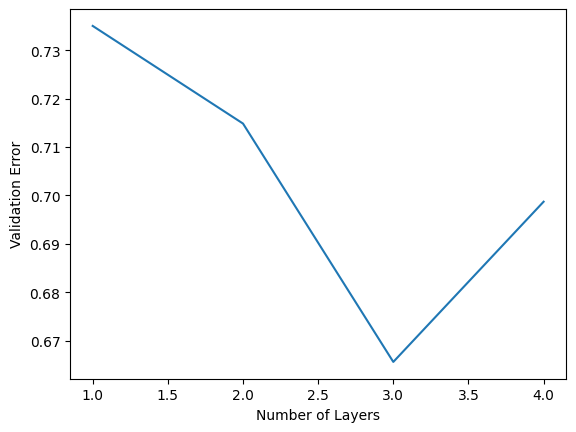

In [92]:
# Ranging the number of layers (keeping 10 hidden nodes and default activation function)

layers = []
val_err_layers = []
for l in range(1, 5):
    mlpr_model = MLPRegressor(hidden_layer_sizes=(10,)*l, 
                            solver="lbfgs",
                            alpha=0, 
                            tol=1e-1, 
                            max_iter=1000)
    mlpr_model.fit(components3, y_train)
    # Calculating the validation error 
    val_components3 = pca3.fit_transform(X_val)
    val_error3 = mean_absolute_error(y_val, mlpr_model.predict(val_components3))

    layers.append(l)
    val_err_layers.append(val_error3)

#plotting validation error as a function of number of layers
plt.plot(layers, val_err_layers)
plt.xlabel('Number of Layers')
plt.ylabel('Validation Error');



In [93]:
#printing results for lowest val error
min_val_error_layers = min(val_err_layers)
min_layers_index = val_err_layers.index(min(val_err_layers))
print(f'The smallest validation error is {min_val_error_layers: .4f} which occurs when there is {layers[min_layers_index]} layers.')


The smallest validation error is  0.6656 which occurs when there is 3 layers.


Lastly, we can investigate what will happen when we change the activation function from the default. The number of layers is kept at 2 and the the number of hidden nodes is kept at 10. 

In [95]:
# Ranging the number of layers (keeping 10 hidden nodes and default activation function)

act = ["identity", "logistic", "tanh", "relu"]
val_err_act = []
for a in range(0, len(act)):
    mlpr_model = MLPRegressor(hidden_layer_sizes=(10,10), 
                            activation = act[a],
                            solver="lbfgs",
                            alpha=0, 
                            tol=1e-1, 
                            max_iter=1000)
    mlpr_model.fit(components3, y_train)
    # Calculating the validation error 
    val_components3 = pca3.fit_transform(X_val)
    val_error3 = mean_absolute_error(y_val, mlpr_model.predict(val_components3))

    val_err_act.append(val_error3)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [96]:
# printing results 
for j in range(0, len(act)):
    print(f'The vaidation error for the "{act[j]}" activation function is {val_err_act[j]: .4f}.')

The vaidation error for the "identity" activation function is  0.7736.
The vaidation error for the "logistic" activation function is  0.8415.
The vaidation error for the "tanh" activation function is  0.7445.
The vaidation error for the "relu" activation function is  1.0039.


In [97]:
#printing results for lowest val error
min_val_error_act = min(val_err_act)
min_act_index = val_err_act.index(min(val_err_act))
print(f'The smallest validation error is {min_val_error_act: .4f} which occurs when the activation function is "{act[min_act_index]}".')


The smallest validation error is  0.7445 which occurs when the activation function is "tanh".


Based on these results, the lowest validation errors are found when the activation function is "tanh", the number of hidden nodes is 8, and the number of layers is 3. We will now try to fit a model with these combinations to see if our validation error can decrease. 

In [98]:
# MLPRegressor with two layers of 10 hidden nodes 
mlpr_model2 = MLPRegressor(hidden_layer_sizes=(8,)*3, activation="tanh")

# Fitting
mlpr_model2.fit(components3, y_train)

# Calculating the validation error 
val_components3b = pca3.fit_transform(X_val)
val_error3b = mean_absolute_error(y_val, mlpr_model2.predict(val_components3b))
print(f'The validation error for the MLPRegressor with 3 layers with 8 nodes and a "tanh" activation function is {val_error3b: .4f}.')

The validation error for the MLPRegressor with 3 layers with 8 nodes and a "tanh" activation function is  0.6799.


## Polynomial features with LASSO

Using polynomials up to second order, fit a LASSO model. Print the validation MAE and make a parity plot for your model compared to the experiments!

In [34]:
# From HW4 Solutions 

import plotly.graph_objects as go
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Linear Regression fit using sklearn
model3 = make_pipeline(PolynomialFeatures(2), Lasso(fit_intercept=False))
model3.fit(X_train, y_train)

print("The validation error is ", np.round(mean_squared_error(y_val, model3.predict(X_val)) ** 0.5,2),'.', sep='')

# Parity plot!
fig = go.Figure(data=[go.Scatter(x=y_val, y=model3.predict(X_val), mode="markers")])

fig.add_shape(type="line",x0=y_val.min(),y0=y_val.min(),x1=y_val.max(),y1=y_val.max())

fig.update_xaxes(title_text="Actual Value")
fig.update_yaxes(title_text="Predicted Value")

# Set the plot size
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+03, tolerance: 7.045e+00
  model = cd_fast.enet_coordinate_descent(
The validation error is 0.52.


## Pick your best model from above and evaluate your final impurity error on the test set.

In [35]:
#test error on model3 -- polynomial features with LASSO

test_MAE = mean_absolute_error(y_test,model3.predict(X_test))

print(f"The test error is {test_MAE:0.4f}.")

The test error on the best tree is 0.3285.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7228e37f-a4a0-4739-abc5-a1a4e6cff676' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>